In [ ]:
import pandas as pd
df=pd.read_csv("/content/all-data.csv",names=['Label', 'Text'], encoding='ISO-8859-1')
df.head()

,Label,Text
0,neutral,"According to Gran , the company has no plans t..."
1,neutral,Technopolis plans to develop in stages an area...
2,negative,The international electronic industry company ...
3,positive,With the new production plant the company woul...
4,positive,According to the company 's updated strategy f...


In [ ]:
df[df["Label"]=="positive"]

,Label,Text
3,positive,With the new production plant the company woul...
4,positive,According to the company 's updated strategy f...
5,positive,FINANCING OF ASPOCOMP 'S GROWTH Aspocomp is ag...
6,positive,"For the last quarter of 2010 , Componenta 's n..."
7,positive,"In the third quarter of 2010 , net sales incre..."
...,...,...
4775,positive,"The apartment block will be well-located , in ..."
4780,positive,"The antibody , given at repeated doses of up t..."
4786,positive,Danske Bank A-S DANSKE DC jumped 3.7 percent t...
4787,positive,Our superior customer centricity and expertise...


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4846 entries, 0 to 4845
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Label   4846 non-null   object
 1   Text    4846 non-null   object
dtypes: object(2)
memory usage: 75.8+ KB


In [ ]:
df.isna().sum()

Label    0
Text     0
dtype: int64

In [ ]:
df['Label'].value_counts()

neutral     2879
positive    1363
negative     604
Name: Label, dtype: int64

In [ ]:
x=df['Text'].values
x.shape

(4846,)

In [ ]:
y=df['Label'].values
y.shape

(4846,)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
(x_train,x_test,y_train,y_test)=train_test_split(x,y,test_size=0.4)
print(x_train.shape)
y_train.shape
x_test.shape
y_test.shape

(2907,)


(1939,)

In [ ]:
df1=pd.DataFrame(x_train)
df1=df1.rename(columns={0:'news'})
df2=pd.DataFrame(y_train)
df2=df2.rename(columns={0:'sentiment'})
df_train=pd.concat([df1,df2],axis=1)
df_train.head()

,news,sentiment
0,The server is responsible for managing devices...,neutral
1,Both operating profit and net sales for the 12...,positive
2,"In future , the company intends to look for kn...",positive
3,To showcase our end-to-end capabilities at the...,neutral
4,The company will make its marketing and sales ...,positive


In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2907 entries, 0 to 2906
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   news       2907 non-null   object
 1   sentiment  2907 non-null   object
dtypes: object(2)
memory usage: 45.5+ KB


In [ ]:
df_train.head()

,news,sentiment
0,The server is responsible for managing devices...,neutral
1,Both operating profit and net sales for the 12...,positive
2,"In future , the company intends to look for kn...",positive
3,To showcase our end-to-end capabilities at the...,neutral
4,The company will make its marketing and sales ...,positive


In [ ]:
df3=pd.DataFrame(x_test)
df3=df3.rename(columns={0:'news'})
df4=pd.DataFrame(y_test)
df4=df2.rename(columns={0:'sentiment'})
df_test=pd.concat([df3,df4],axis=1)

In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2907 entries, 0 to 2906
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   news       1939 non-null   object
 1   sentiment  2907 non-null   object
dtypes: object(2)
memory usage: 45.5+ KB


In [ ]:
df_test.head()

,news,sentiment
0,"A maximum of 20 employees , who work in Kartta...",neutral
1,"The gross area of eight houses will be 12,167 ...",positive
2,Swedish telco TeliaSonera is teaming up with F...,positive
3,"In 2007 , Marimekko has also opened concept st...",neutral
4,`` Ruukki is now included on DJSI World for th...,positive


In [ ]:
#removing punctuations
#library that contains punctuation
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
#defining the function to remove punctuation
def remove_punctuation(text):
  if(type(text)==float):
    return text
  ans=""  
  for i in text:     
    if i not in string.punctuation:
      ans+=i    
  return ans

In [ ]:
#storing the puntuation free text in a new column called clean_msg
df_train['news']= df_train['news'].apply(lambda x:remove_punctuation(x))
df_test['news']= df_test['news'].apply(lambda x:remove_punctuation(x))

In [ ]:
df_train.head()
#punctuations are removed from news column in train dataset

,news,sentiment
0,The server is responsible for managing devices...,neutral
1,Both operating profit and net sales for the 12...,positive
2,In future the company intends to look for kno...,positive
3,To showcase our endtoend capabilities at the M...,neutral
4,The company will make its marketing and sales ...,positive


In [ ]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
#method to generate n-grams:
#params:
#text-the text for which we have to generate n-grams
#ngram-number of grams to be generated from the text(1,2,3,4 etc., default value=1)

In [ ]:
def generate_N_grams(text,ngram=1):
  if (type(text)==str):
    words=[word for word in text.split(" ") if word not in set(stopwords.words('english'))]  
    #print("Sentence after removing stopwords:",words)
    temp=zip(*[words[i:] for i in range(0,ngram)])
    ans=[' '.join(ngram) for ngram in temp]
  else:
    ans=[]
  return ans

In [ ]:
#sample!
generate_N_grams("The sun rises in the east".lower(),3)

['sun rises east']

In [ ]:
from collections import defaultdict

In [ ]:
positiveValues=defaultdict(int)
negativeValues=defaultdict(int)
neutralValues=defaultdict(int)
#positiveValues{key:value}

#get the count of every word in both the columns of df_train and df_test dataframes

In [ ]:
#get the count of every word in both the columns of df_train and df_test dataframes where sentiment="positive"
for text in df_train[df_train.sentiment=="positive"].news:
  for word in generate_N_grams(text,2):
    positiveValues[word]+=1 # sun :2

In [ ]:
#get the count of every word in both the columns of df_train and df_test dataframes where sentiment="positive"
for text in df_test[df_test.sentiment=="positive"].news:
  for word in generate_N_grams(text,2):
    positiveValues[word]+=1

In [ ]:
#get the count of every word in both the columns of df_train and df_test dataframes where sentiment="negative"
for text in df_train[df_train.sentiment=="negative"].news:
  for word in generate_N_grams(text,1):
    negativeValues[word]+=1

In [ ]:
#get the count of every word in both the columns of df_train and df_test dataframes where sentiment="negative"
for text in df_test[df_test.sentiment=="negative"].news:
  for word in generate_N_grams(text,2):
    negativeValues[word]+=1

In [ ]:
#get the count of every word in both the columns of df_train and df_test dataframes where sentiment="neutral"
for text in df_train[df_train.sentiment=="neutral"].news:
  for word in generate_N_grams(text):
    neutralValues[word]+=1

In [ ]:
#get the count of every word in both the columns of df_train and df_test dataframes where sentiment="neutral"
for text in df_test[df_test.sentiment=="neutral"].news:
  for word in generate_N_grams(text):
    neutralValues[word]+=1

In [ ]:
#focus on more frequently occuring words for every sentiment=>
#sort in DO wrt 2nd column in each of positiveValues,negativeValues and neutralValues
df_positive=pd.DataFrame(sorted(positiveValues.items(),key=lambda x:x[1],reverse=True))
df_negative=pd.DataFrame(sorted(negativeValues.items(),key=lambda x:x[1],reverse=True))
df_neutral=pd.DataFrame(sorted(neutralValues.items(),key=lambda x:x[1],reverse=True))

In [ ]:
pd1=df_positive[0][:10] #{key : value } { 'sun': 10}
pd2=df_positive[1][:10]
"""
ned1=df_negative[0][:10]
ned2=df_negative[1][:10]

nud1=df_neutral[0][:10]
nud2=df_neutral[1][:10]
"""

'\nned1=df_negative[0][:10]\nned2=df_negative[1][:10]\n\nnud1=df_neutral[0][:10]\nnud2=df_neutral[1][:10]\n'

In [ ]:
import matplotlib.pyplot as plt

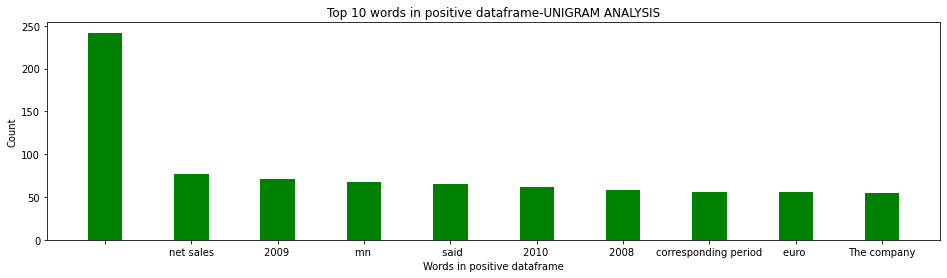

In [ ]:
plt.figure(1,figsize=(16,4))
plt.bar(pd1,pd2, color ='green',
        width = 0.4)
plt.xlabel("Words in positive dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in positive dataframe-UNIGRAM ANALYSIS")
plt.savefig("positive-unigram.png")
plt.show()

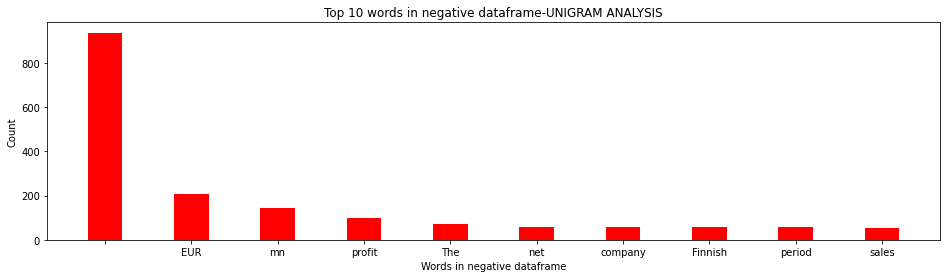

In [ ]:
plt.figure(1,figsize=(16,4))
plt.bar(ned1,ned2, color ='red',
        width = 0.4)
plt.xlabel("Words in negative dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in negative dataframe-UNIGRAM ANALYSIS")
plt.savefig("negative-unigram.png")
plt.show()

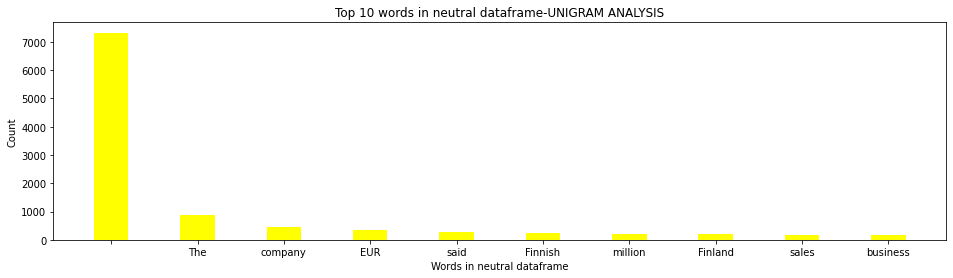

In [ ]:
plt.figure(1,figsize=(16,4))
plt.bar(nud1,nud2, color ='yellow',
        width = 0.4)
plt.xlabel("Words in neutral dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in neutral dataframe-UNIGRAM ANALYSIS")
plt.savefig("neutral-unigram.png")
plt.show()